# RUMOR DETECTION

## import dataset and libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
df1=pd.read_csv(r'/content/source_tweets.txt',  encoding='utf-8', delimiter='\t' ,
                 names=["Target", "Tweets"])

In [ ]:
df_label1=pd.read_csv(r'/content/label.txt',  encoding='utf-8', delimiter='\t' ,
                 names=["Label"])

In [ ]:
df1.head()

,Target,Tweets
0,731166399389962242,🔥ca kkk grand wizard 🔥 endorses @hillaryclinto...
1,714598641827246081,an open letter to trump voters from his top st...
2,691809004356501505,america is a nation of second chances —@potus ...
3,693204708933160960,"brandon marshall visits and offers advice, sup..."
4,551099691702956032,rip elly may clampett: so sad to learn #beverl...


In [ ]:
df_label1.head()

,Label
0,unverified:731166399389962242
1,unverified:714598641827246081
2,non-rumor:691809004356501505
3,non-rumor:693204708933160960
4,true:551099691702956032


In [ ]:
data2=[]
for i in df_label1['Label']:
    data2.append(i.split(':'))


df_new_label=pd.DataFrame(data2,columns=['Label','Target'])

In [ ]:
df_new_label.head()

,Label,Target
0,unverified,731166399389962242
1,unverified,714598641827246081
2,non-rumor,691809004356501505
3,non-rumor,693204708933160960
4,true,551099691702956032


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Target  1490 non-null   int64 
 1   Tweets  1490 non-null   object
dtypes: int64(1), object(1)
memory usage: 23.4+ KB


In [ ]:
df_new_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   1490 non-null   object
 1   Target  1490 non-null   object
dtypes: object(2)
memory usage: 23.4+ KB


In [ ]:
df_new_label['Target'] = df_new_label['Target'].astype(str).astype(int)

In [ ]:
df_new_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   1490 non-null   object
 1   Target  1490 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 23.4+ KB


In [ ]:
merged_new_df=pd.concat([df1, df_new_label], axis=1)

In [ ]:
merged_new_df.head()

,Target,Tweets,Label,Target
0,731166399389962242,🔥ca kkk grand wizard 🔥 endorses @hillaryclinto...,unverified,731166399389962242
1,714598641827246081,an open letter to trump voters from his top st...,unverified,714598641827246081
2,691809004356501505,america is a nation of second chances —@potus ...,non-rumor,691809004356501505
3,693204708933160960,"brandon marshall visits and offers advice, sup...",non-rumor,693204708933160960
4,551099691702956032,rip elly may clampett: so sad to learn #beverl...,true,551099691702956032


In [ ]:
merged_new_df['Label'].value_counts()

,count
Label,
unverified,374
non-rumor,374
true,372
false,370


In [ ]:
merged_new_df.shape

(1490, 4)

In [ ]:
df=pd.read_csv(r'/content/source_tweets_16.txt',  encoding='utf-8', delimiter='\t' ,
                 names=["Target", "Tweets"])

In [ ]:
df_label=pd.read_csv(r'/content/label_16.txt',  encoding='utf-8', delimiter='\t' ,
                 names=["Label"])

In [ ]:
df_label.head()

,Label
0,false:656955120626880512
1,true:615689290706595840
2,false:613404935003217920
3,unverified:731166399389962242
4,unverified:714598641827246081


In [ ]:
data=[]
for i in df_label['Label']:
    data.append(i.split(':'))


df_new=pd.DataFrame(data,columns=['Label','Target'])

In [ ]:
df_new.head()

,Label,Target
0,false,656955120626880512
1,true,615689290706595840
2,false,613404935003217920
3,unverified,731166399389962242
4,unverified,714598641827246081


In [ ]:
df.head()

,Target,Tweets
0,656955120626880512,correct predictions in back to the future ii URL
1,615689290706595840,.@whitehouse in rainbow colors for #scotusmarr...
2,613404935003217920,cops bought the alleged church shooter burger ...
3,731166399389962242,🔥ca kkk grand wizard 🔥 endorses @hillaryclinto...
4,714598641827246081,an open letter to trump voters from his top st...


In [ ]:

df_new=pd.concat([df, df_new], axis=1)

In [ ]:
df_new.head()

,Target,Tweets,Label,Target
0,656955120626880512,correct predictions in back to the future ii URL,false,656955120626880512
1,615689290706595840,.@whitehouse in rainbow colors for #scotusmarr...,true,615689290706595840
2,613404935003217920,cops bought the alleged church shooter burger ...,false,613404935003217920
3,731166399389962242,🔥ca kkk grand wizard 🔥 endorses @hillaryclinto...,unverified,731166399389962242
4,714598641827246081,an open letter to trump voters from his top st...,unverified,714598641827246081


In [ ]:
df_new.shape

(818, 4)

In [ ]:
df_new['Label'].value_counts()

,count
Label,
true,207
false,205
non-rumor,205
unverified,201


In [ ]:

final_df=pd.concat([df_new, merged_new_df], axis=0)

In [ ]:
final_df.head()

,Target,Tweets,Label,Target
0,656955120626880512,correct predictions in back to the future ii URL,false,656955120626880512
1,615689290706595840,.@whitehouse in rainbow colors for #scotusmarr...,true,615689290706595840
2,613404935003217920,cops bought the alleged church shooter burger ...,false,613404935003217920
3,731166399389962242,🔥ca kkk grand wizard 🔥 endorses @hillaryclinto...,unverified,731166399389962242
4,714598641827246081,an open letter to trump voters from his top st...,unverified,714598641827246081


In [ ]:
final_df.shape

(2308, 4)

## Preprocessing

In [ ]:
final_df.head()

,Target,Tweets,Label,Target
0,656955120626880512,correct predictions in back to the future ii URL,false,656955120626880512
1,615689290706595840,.@whitehouse in rainbow colors for #scotusmarr...,true,615689290706595840
2,613404935003217920,cops bought the alleged church shooter burger ...,false,613404935003217920
3,731166399389962242,🔥ca kkk grand wizard 🔥 endorses @hillaryclinto...,unverified,731166399389962242
4,714598641827246081,an open letter to trump voters from his top st...,unverified,714598641827246081


In [ ]:
final_df['Label'].unique()

array(['false', 'true', 'unverified', 'non-rumor'], dtype=object)

In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2308 entries, 0 to 1489
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Target  2308 non-null   int64 
 1   Tweets  2308 non-null   object
 2   Label   2308 non-null   object
 3   Target  2308 non-null   object
dtypes: int64(1), object(3)
memory usage: 90.2+ KB


In [ ]:
final_df.isnull().sum()

,0
Target,0
Tweets,0
Label,0
Target,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
final_df[final_df['Label']=='unverified']

,Target,Tweets,Label,Target
3,731166399389962242,🔥ca kkk grand wizard 🔥 endorses @hillaryclinto...,unverified,731166399389962242
4,714598641827246081,an open letter to trump voters from his top st...,unverified,714598641827246081
6,715515982584881152,craigslist ad: ‘get paid $15 an hour to protes...,unverified,715515982584881152
35,706665777332621314,".@berniesanders: in 2016, ""we will end institu...",unverified,706665777332621314
42,726043971911213057,"target boycott crosses 1 million signers, stoc...",unverified,726043971911213057
...,...,...,...,...
1470,531733274968989696,reports that is leader abu bakr al-baghdadi wa...,unverified,531733274968989696
1471,707300612862566400,"obama to skip nancy reagan’s funeral, attend e...",unverified,707300612862566400
1486,760109079133990912,“after school satan clubs”? URL,unverified,760109079133990912
1487,500281131057811456,breaking news: according to documents released...,unverified,500281131057811456


In [ ]:
final_df[final_df['Label']=='true']

,Target,Tweets,Label,Target
1,615689290706595840,.@whitehouse in rainbow colors for #scotusmarr...,true,615689290706595840
5,614467824313106432,god put a rainbow over the white house 🌈 URL,true,614467824313106432
12,553589051044151296,several hostages freed at jewish supermarket i...,true,553589051044151296
13,553590835850514433,"hostage-taker in supermarket siege killed, rep...",true,553590835850514433
16,616311563071434753,apologies if you've already seen a crow riding...,true,616311563071434753
...,...,...,...,...
1477,407198615137181696,r.i.p roger rodas the man who died with paul w...,true,407198615137181696
1480,528242965915779072,officials took away this halloween decoration ...,true,528242965915779072
1481,407205235682050048,r.i.p to the driver that died with paul walker...,true,407205235682050048
1482,508002575858561024,"pentagon confirms ahmed abdi godane, a leader ...",true,508002575858561024


In [ ]:
final_df[final_df['Label']=='false']

,Target,Tweets,Label,Target
0,656955120626880512,correct predictions in back to the future ii URL,false,656955120626880512
2,613404935003217920,cops bought the alleged church shooter burger ...,false,613404935003217920
9,622891631293935616,#wakeupamerica🇺🇸 who needs a #gun registry whe...,false,622891631293935616
14,622858454949040128,in heaven chick-fil-a is open on sundays.,false,622858454949040128
15,656870311057575936,the 5 most accurate predictions from the decad...,false,656870311057575936
...,...,...,...,...
1461,540333359793451008,obama's daughter is pregnant lol michelle shou...,false,540333359793451008
1462,514495841600811009,iphone 6 owners claim it's bending in their po...,false,514495841600811009
1467,534445263528947712,missouri governor declares state of emergency ...,false,534445263528947712
1475,519868410599993344,thumbs up emoji rt @complexmag someone spray p...,false,519868410599993344


In [ ]:
final_df[final_df['Label']=='non-rumor']

,Target,Tweets,Label,Target
7,693315824132685824,#quasimodo: dog with short spine has big heart...,non-rumor,693315824132685824
8,693843042546106369,need to #getcovered? most people can find a he...,non-rumor,693843042546106369
10,692630756548591616,japan's economy minister akira amari resigns o...,non-rumor,692630756548591616
11,693265096278163456,german shepherd with a rare spinal condition l...,non-rumor,693265096278163456
17,641666167992647681,"oh, you invented the pencil? #appleevent URL",non-rumor,641666167992647681
...,...,...,...,...
1476,692764799315398656,french police arrest woman who was with man ca...,non-rumor,692764799315398656
1478,767768054163996672,it wasn't even close. URL,non-rumor,767768054163996672
1479,692747901815119872,cdc: 31 cases of zika virus in 11 us states; a...,non-rumor,692747901815119872
1483,685633217160998912,"happy 74th birthday, stephen hawking! URL",non-rumor,685633217160998912


**Distribution of Labels**

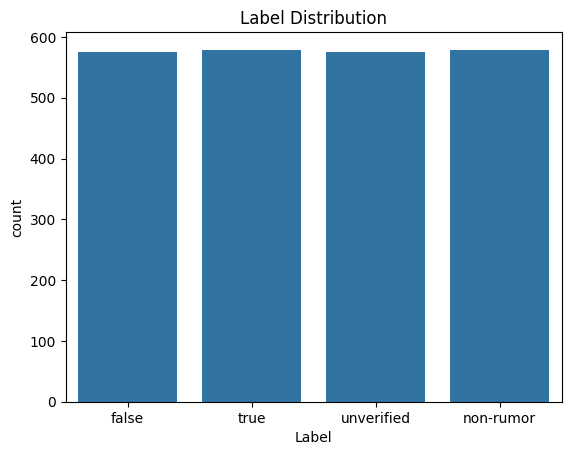

In [ ]:

sns.countplot(x='Label', data=final_df)
plt.title('Label Distribution')
plt.show()


In [ ]:
final_df['Tweets'].sample(5).values

array(['canadian authorities have given name of suspect in ottawa attacks to u.s. feds; ask for fbi assistance: sr u.s. law enforcement official',
       'caitlyn jenner will pose nude on the sports illustrated cover. nothing says sexy like a 66 year old chick with balls.',
       'renting vs. owning a home: a side-by-side comparison URL URL',
       'breaking update: canadian soldier injured at parliament hill shooting dies URL #ottawa',
       'the world is running out of chocolate, world’s largest chocolate manufacturer warns URL URL'],
      dtype=object)

**Text Length Distribution**

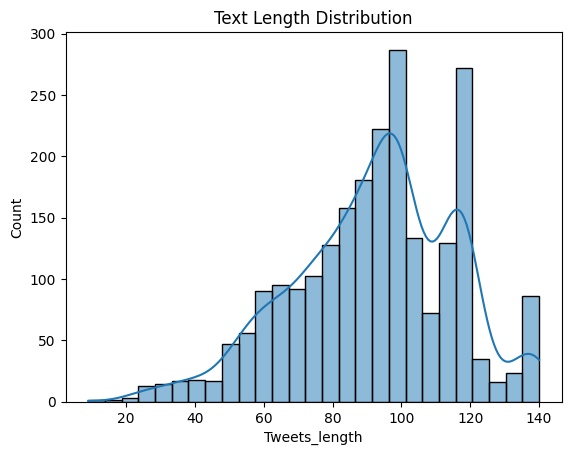

In [ ]:
final_df['Tweets_length'] = final_df['Tweets'].apply(lambda x: len(str(x)))

sns.histplot(final_df['Tweets_length'], kde=True)
plt.title('Text Length Distribution')
plt.show()

**Word Cloud for Visualization of Common Words**

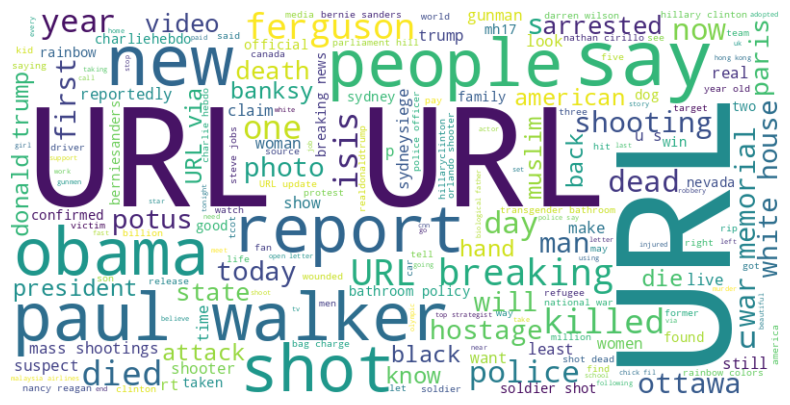

In [ ]:
from wordcloud import WordCloud

text = ' '.join(final_df['Tweets'].dropna())

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


**Exploring the Relationship Between Labels and Text:**

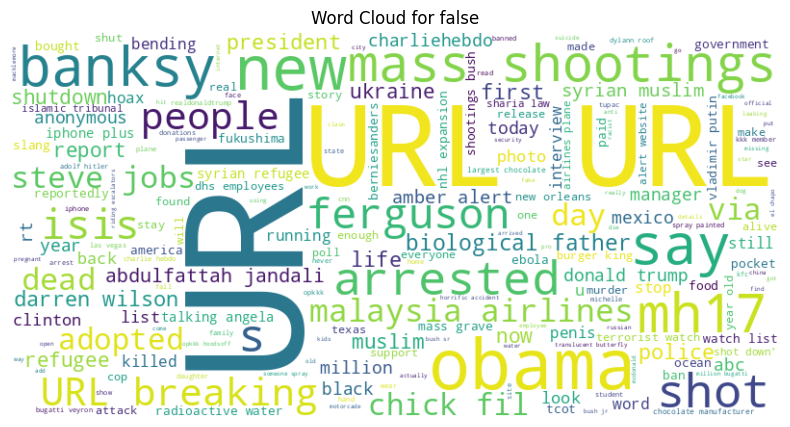

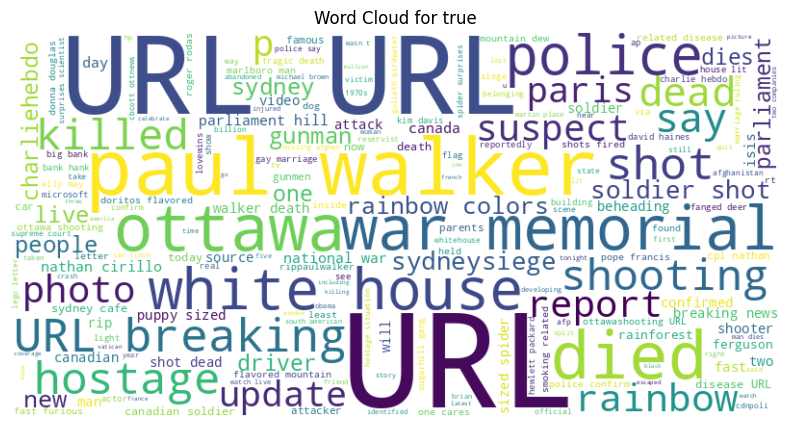

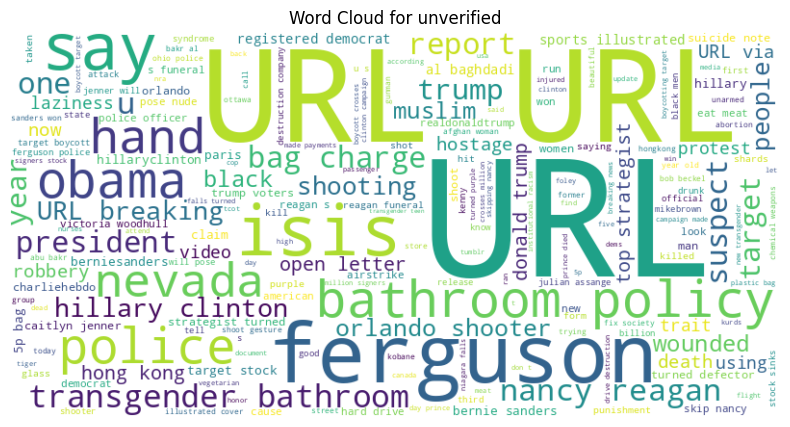

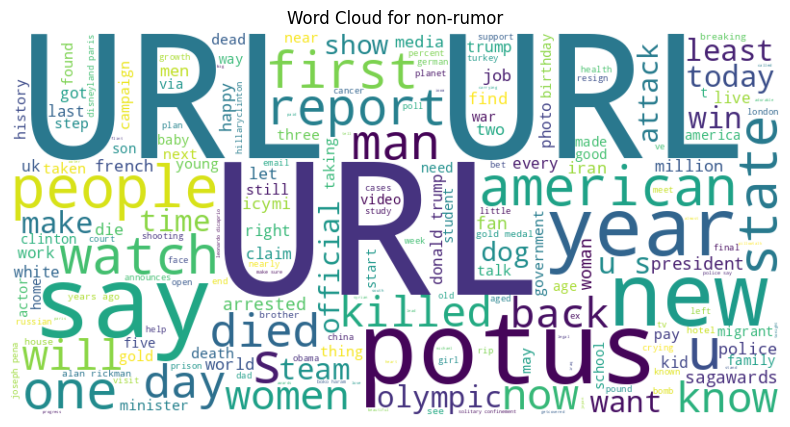

In [ ]:

labels = final_df['Label'].unique()

for label in labels:
    text = ' '.join(final_df[final_df['Label'] == label]['Tweets'].dropna())
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {label}')
    plt.axis('off')
    plt.show()


**Merge Labels**
* Merge "True" and "Non-rumor" → “Non-rumor" (since both contain accurate or non-misleading information).
* Merge "False" and "Unverified" → “Rumor" (since unverified rumors can turn out to be false).


In [ ]:
label_mapping = {
    'true': 'Non-rumor',
    'non-rumor': 'Non-rumor',
    'false': 'Rumor',
    'unverified': 'Rumor'
}
final_df['Label'] = final_df['Label'].map(label_mapping)

In [ ]:
final_df['Label']

,Label
0,Rumor
1,Non-rumor
2,Rumor
3,Rumor
4,Rumor
...,...
1485,Non-rumor
1486,Rumor
1487,Rumor
1488,Rumor


In [ ]:
maps={'Rumor':0, 'Non-rumor':1}
final_df['Label']=final_df['Label'].map(maps)

In [ ]:
final_df.head()

,Target,Tweets,Label,Target,Tweets_length
0,656955120626880512,correct predictions in back to the future ii URL,0,656955120626880512,48
1,615689290706595840,.@whitehouse in rainbow colors for #scotusmarr...,1,615689290706595840,96
2,613404935003217920,cops bought the alleged church shooter burger ...,0,613404935003217920,75
3,731166399389962242,🔥ca kkk grand wizard 🔥 endorses @hillaryclinto...,0,731166399389962242,76
4,714598641827246081,an open letter to trump voters from his top st...,0,714598641827246081,92


**Visualize new label distribution**

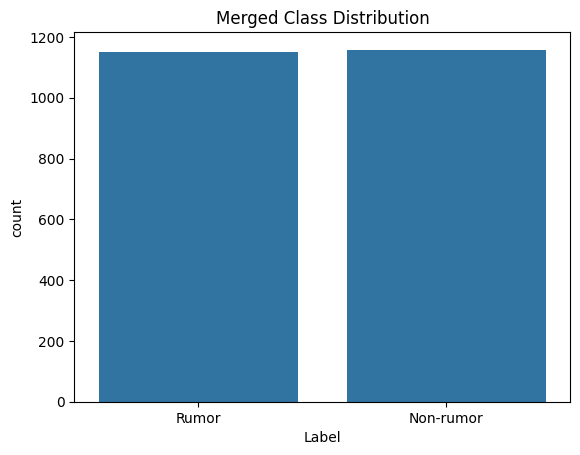

In [ ]:
sns.countplot(x=final_df['Label'])
plt.title("Merged Class Distribution")
plt.xticks(ticks=[0, 1], labels=["Rumor", "Non-rumor"])
plt.show()

In [ ]:
df=final_df.drop(['Target','Target','Tweets_length'],axis=1)

In [ ]:
df.head()

,Tweets,Label
0,correct predictions in back to the future ii URL,0
1,.@whitehouse in rainbow colors for #scotusmarr...,1
2,cops bought the alleged church shooter burger ...,0
3,🔥ca kkk grand wizard 🔥 endorses @hillaryclinto...,0
4,an open letter to trump voters from his top st...,0


In [ ]:
df.shape

(2308, 2)

In [ ]:
df['Label'].value_counts()

,count
Label,
1,1158
0,1150


In [ ]:
df.isnull().sum()

,0
Tweets,0
Label,0


In [ ]:
df.duplicated().sum()

289

In [ ]:
df=df.drop_duplicates()

## Separating the data and label

In [ ]:
x=df.drop('Label',axis=1)
y=df['Label']

### removing HTML Tags

In [ ]:

def remove_html_tags(text):
    html_pattern = re.compile('<.*?>')
    clean_text = re.sub(html_pattern, '', text)
    return clean_text


df['Tweets'] = df['Tweets'].apply(remove_html_tags)

### remove punctuation

In [ ]:
import string
def remove_punctuation(text):
    cleaned_text = text.translate(str.maketrans('', '', string.punctuation))
    return cleaned_text


In [ ]:
df['Tweets'] = df['Tweets'].apply(remove_punctuation)

### removing emojis

In [ ]:
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 10.3 MB/s eta 0:00:00


In [ ]:
import emoji
def removing_emojis(text):
    return emoji.demojize(text)


In [ ]:
df['Tweets'] = df['Tweets'].apply(removing_emojis)

### removing stopwords and lemmatize

In [ ]:
from nltk.stem import WordNetLemmatizer

ps = WordNetLemmatizer()
def lemmatizing(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [ps.lemmatize(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [ ]:
df['Tweets'] = df['Tweets'].apply(lemmatizing)

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
df['Tweets']

,Tweets
0,correct prediction back future ii url
1,whitehouse rainbow color scotusmarriage here t...
2,cop bought alleged church shooter burger king ...
3,fire ca kkk grand wizard fire endorses hillary...
4,open letter trump voter top strategistturnedde...
...,...
1484,marlboro ad man eric lawson dy chronic lung di...
1485,potus announced new reform address overuse sol...
1487,breaking news according document released pres...
1488,ebola vaccine url news today


In [ ]:
X=df['Tweets'].values
Y=df['Label'].values

### coverting the textual data to numerical data

In [ ]:

from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer()
X = tv.fit_transform(X).toarray()

## Splitting the dataset to training & test data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

In [ ]:
x_train.shape, x_test.shape

((1615, 5292), (404, 5292))

In [ ]:
y_train.shape, y_test.shape


((1615,), (404,))

## training the model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import  GridSearchCV

In [ ]:
# creating a dictionary to store models
models = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=300,max_depth=20,min_samples_split=10,min_samples_leaf=4,max_features='sqrt',
    bootstrap=True,class_weight='balanced',random_state=42,n_jobs=-1),
    'SVC':SVC(gamma='scale', kernel='linear',degree=2),
    'XGBoost':XGBClassifier(n_estimators=20, max_depth=10, learning_rate=1, objective='binary:logistic')
}

for model_name,model in models.items():
    model.fit(x_train,y_train)
    predictions=model.predict(x_test)
    accuracy=accuracy_score(y_test,predictions)
    cm=confusion_matrix(y_test,predictions)
    print(f'{model_name} accuracy: {accuracy}')
    print(f'{model_name} confusion_matrix: {cm}')

Logistic Regression accuracy: 0.8316831683168316
Logistic Regression confusion_matrix: [[135  53]
 [ 15 201]]
K-Nearest Neighbors accuracy: 0.8118811881188119
K-Nearest Neighbors confusion_matrix: [[153  35]
 [ 41 175]]
Decision Tree accuracy: 0.7351485148514851
Decision Tree confusion_matrix: [[130  58]
 [ 49 167]]
Random Forest accuracy: 0.7673267326732673
Random Forest confusion_matrix: [[140  48]
 [ 46 170]]
SVC accuracy: 0.8589108910891089
SVC confusion_matrix: [[148  40]
 [ 17 199]]
XGBoost accuracy: 0.7722772277227723
XGBoost confusion_matrix: [[125  63]
 [ 29 187]]


In [ ]:
rf = SVC(gamma='scale', kernel='linear',degree=3)
rf.fit(x_train,y_train)

SVC(kernel='linear')

In [ ]:
# on testing set
testing_y_pred = rf.predict(x_test)
print(accuracy_score(testing_y_pred,y_test))

0.8589108910891089


**Hyperparameter tuning**

In [ ]:

from sklearn.model_selection import GridSearchCV


param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1],
    'degree': [2, 3, 4]
}

svc = SVC()

# Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(svc, param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search.fit(x_train, y_train)

# Best parameters and accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


Fitting 3 folds for each of 180 candidates, totalling 540 fits


KeyboardInterrupt: 

In [ ]:

print("Best Parameters from GridSearchCV:", grid_search.best_params_)

Best Parameters from GridSearchCV: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
best_rf=grid_search.best_estimator_
best_rf.fit(x_train,y_train)

NameError: name 'grid_search' is not defined

In [ ]:
y_pred = best_rf.predict(x_test)


In [ ]:
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.75      0.83       188
           1       0.81      0.94      0.87       216

    accuracy                           0.85       404
   macro avg       0.87      0.85      0.85       404
weighted avg       0.86      0.85      0.85       404

Accuracy: 0.8539603960396039


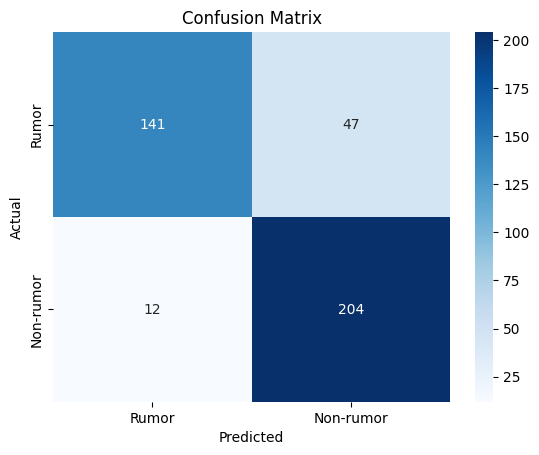

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Rumor','Non-rumor'], yticklabels=['Rumor','Non-rumor'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

**Compare Training & Test Accuracy**

In [ ]:
train_accuracy = best_rf.score(x_train, y_train)
test_accuracy = best_rf.score(x_test, y_test)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Check for overfitting
if train_accuracy - test_accuracy > 0.1:
    print("Warning: Possible Overfitting Detected!")


Training Accuracy: 1.0000
Test Accuracy: 0.8540


**Check Classification Report & Confusion Matrix**

Train Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       725
           1       1.00      1.00      1.00       890

    accuracy                           1.00      1615
   macro avg       1.00      1.00      1.00      1615
weighted avg       1.00      1.00      1.00      1615

Test Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.75      0.83       188
           1       0.81      0.94      0.87       216

    accuracy                           0.85       404
   macro avg       0.87      0.85      0.85       404
weighted avg       0.86      0.85      0.85       404



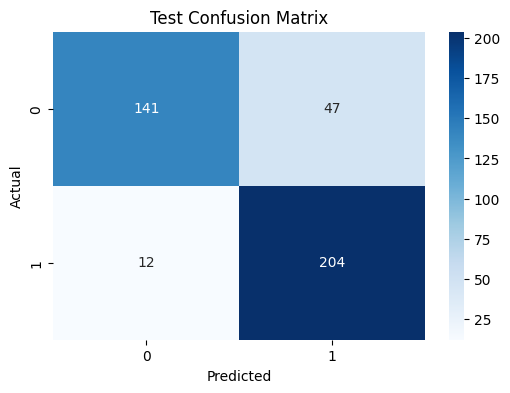

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred_train = best_rf.predict(x_train)
y_pred_test = best_rf.predict(x_test)

print("Train Classification Report:\n", classification_report(y_train, y_pred_train))
print("Test Classification Report:\n", classification_report(y_test, y_pred_test))

# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Test Confusion Matrix")
plt.show()


**Cross-Validation to Detect Overfitting**
* If cross-validation accuracy is much lower than training accuracy, your model is overfitting.



In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(best_rf, x_train, y_train, cv=5, scoring='accuracy')

print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.4f}")
print(f"Standard Deviation: {cv_scores.std():.4f}")


Cross-Validation Scores: [0.78637771 0.79876161 0.80495356 0.85139319 0.82043344]
Mean CV Accuracy: 0.8124
Standard Deviation: 0.0224


**Fixes Overfitting**

In [ ]:
rf_new = RandomForestClassifier(
    n_estimators=300,
    max_depth=20,
    min_samples_split=10,
    min_samples_leaf=4,
    max_features='sqrt',
    bootstrap=True,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)


In [ ]:
rf_new.fit(x_train, y_train)

y_pred_new = rf.predict(x_test)

In [ ]:
print("Classification Report:\n", classification_report(y_test, y_pred_new))
print("Test Accuracy:", accuracy_score(y_test, y_pred_new))


Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.72      0.81       188
           1       0.80      0.96      0.87       216

    accuracy                           0.85       404
   macro avg       0.87      0.84      0.84       404
weighted avg       0.86      0.85      0.84       404

Test Accuracy: 0.8465346534653465


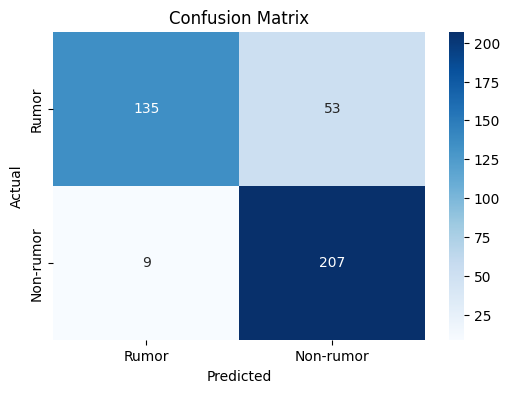

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_new), annot=True, fmt="d", cmap="Blues", xticklabels=["Rumor", "Non-rumor"], yticklabels=["Rumor", "Non-rumor"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
train_accuracy = rf_new.score(x_train, y_train)
test_accuracy = rf_new.score(x_test, y_test)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Check for overfitting
if train_accuracy - test_accuracy > 0.1:
    print("Warning: Possible Overfitting Detected!")
else:
    print("Doesn't Overfit")


Training Accuracy: 0.8582
Test Accuracy: 0.7871
Doesn't Overfit


In [ ]:
input_data = x_test[17].reshape(1,-1)
prediction = rf_new.predict(input_data)

In [ ]:
prediction[0]

0

In [ ]:
y_test[17]

0

In [ ]:
val={0:'Rumor', 1:'Non-rumor'}
if prediction[0] in val:
    output = val[prediction[0]]
    if prediction[0]==0:
        print(output)
    else:
        print(output)
else:
    print("Sorry we are not able to detect")

Rumor


**Saving & Loading model**

In [ ]:
import pickle
pickle.dump(rf_new,open('/kaggle/working/rf.pkl','wb'))


In [ ]:
pickle.dump(tv,open('/kaggle/working/vectorizer.pkl','wb'))

In [ ]:
import numpy as np